In [ ]:
import pandas as pd
import random

In [ ]:
L = []

for i in range(10000):
  a = random.randint(1, 6)
  b = random.randint(1, 6)

  L.append(a+b)


In [ ]:
print(len(L))
L[:5]

10000


[6, 6, 11, 9, 8]

In [ ]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s

,count
2,0.0282
3,0.0544
4,0.0843
5,0.1104
6,0.1361
7,0.1689
8,0.1464
9,0.1043
10,0.0847
11,0.0545


In [ ]:
import numpy as np
np.cumsum(s)

,count
2,0.0282
3,0.0826
4,0.1669
5,0.2773
6,0.4134
7,0.5823
8,0.7287
9,0.8330
10,0.9177
11,0.9722


### Bar plot

<Axes: >

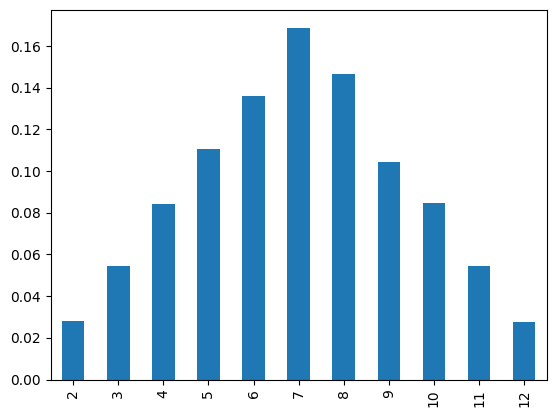

In [ ]:
s.plot(kind='bar')

CDF for PMF

<Axes: >

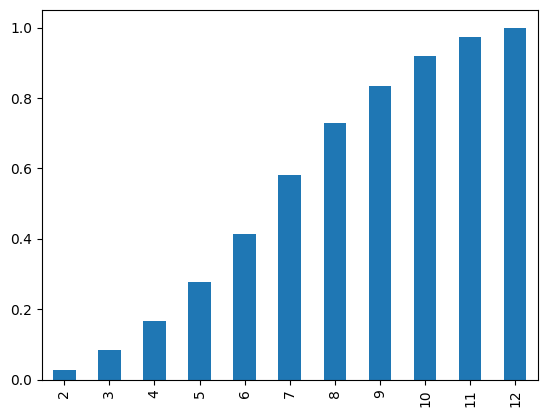

In [ ]:
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [ ]:
sample.mean()

np.float64(49.75398729738858)

(array([ 22.,  54., 129., 217., 232., 219.,  91.,  28.,   7.,   1.]),
 array([35.68883399, 38.96842411, 42.24801423, 45.52760436, 48.80719448,
        52.0867846 , 55.36637472, 58.64596484, 61.92555497, 65.20514509,
        68.48473521]),
 <BarContainer object of 10 artists>)

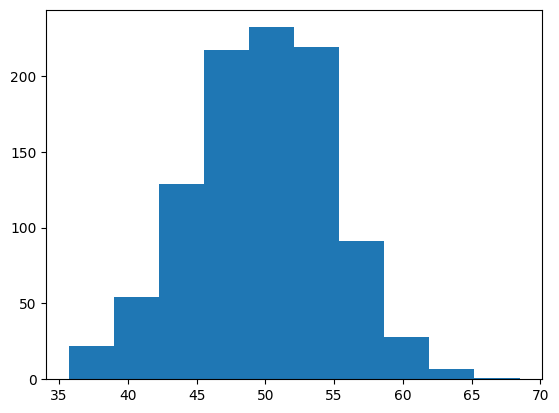

In [ ]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [ ]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

print("sample mean :", sample_mean)
print("sample std :", sample_std)

sample mean : 49.75398729738858
sample std : 5.111035468274596


In [ ]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values

array([35.68883399, 36.02010572, 36.35137745, 36.68264918, 37.01392091,
       37.34519264, 37.67646437, 38.0077361 , 38.33900783, 38.67027956,
       39.00155128, 39.33282301, 39.66409474, 39.99536647, 40.3266382 ,
       40.65790993, 40.98918166, 41.32045339, 41.65172512, 41.98299685,
       42.31426858, 42.64554031, 42.97681204, 43.30808377, 43.6393555 ,
       43.97062723, 44.30189896, 44.63317069, 44.96444242, 45.29571415,
       45.62698587, 45.9582576 , 46.28952933, 46.62080106, 46.95207279,
       47.28334452, 47.61461625, 47.94588798, 48.27715971, 48.60843144,
       48.93970317, 49.2709749 , 49.60224663, 49.93351836, 50.26479009,
       50.59606182, 50.92733355, 51.25860528, 51.58987701, 51.92114873,
       52.25242046, 52.58369219, 52.91496392, 53.24623565, 53.57750738,
       53.90877911, 54.24005084, 54.57132257, 54.9025943 , 55.23386603,
       55.56513776, 55.89640949, 56.22768122, 56.55895295, 56.89022468,
       57.22149641, 57.55276814, 57.88403987, 58.21531159, 58.54

In [ ]:
sample.max()

np.float64(68.48473520870836)

In [ ]:
prob_densities = [dist.pdf(value) for value in values]

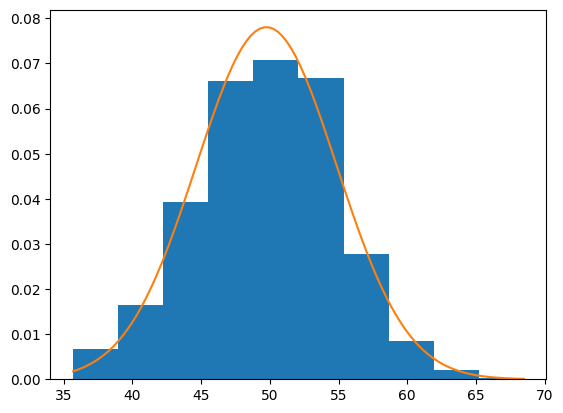

In [ ]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,prob_densities)

/tmp/ipython-input-94-3735408510.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample, kde=True)


Text(0, 0.5, 'Density')

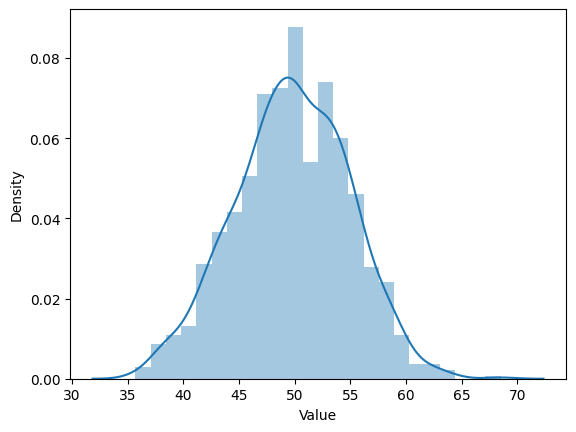

In [ ]:
import seaborn as sns
sns.distplot(sample, kde=True)
plt.xlabel("Value")
plt.ylabel("Density")

### KDE

In [ ]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [ ]:
print(sample.size)
sample

1000


array([27.39771702, 23.54263431, 19.84405668, 20.4340442 , 23.51301645,
       16.66552603, 29.66569071, 20.07696028, 24.43426463, 35.63347263,
       26.66277882, 18.02907346, 18.78038348, 23.2924436 , 23.07223578,
       14.45674157, 20.35528975, 19.76070562, 10.80795841, 22.92501586,
       21.49929371, 29.51348929, 15.26688362, 20.07944229, 18.07666237,
       24.34219643, 12.94910032, 32.32805196, 20.24442166, 22.37411636,
       16.72973621, 13.82772221, 21.00301263, 16.98433137, 13.13124468,
       20.17283843, 15.95515613, 12.96447725, 21.01784249, 21.36302553,
       23.70989074, 17.78185563, 15.80536174, 22.66969363, 14.19611394,
       22.92668   , 12.93042619,  6.34838752, 24.8295763 , 18.63368883,
       22.92163606, 21.49923065, 12.51145318, 20.96029633, 25.63215467,
       22.8018275 , 25.57313043, 24.46716934, 19.67109262, 21.83808558,
       23.16017822, 26.68406244, 19.96823955, 19.1747155 , 26.64125126,
       13.7253879 , 22.19892171, 16.95135726, 17.929662  , 14.93

(array([ 1.,  2.,  2.,  0.,  5.,  5.,  9., 13., 18., 13., 15., 13., 15.,
        21., 19., 20., 19., 22., 21., 16., 10., 21.,  8.,  8.,  6.,  6.,
        15.,  6., 20., 20., 30., 48., 43., 43., 43., 51., 61., 50., 64.,
        34., 35., 34., 27., 15., 19., 17.,  6.,  4.,  4.,  3.]),
 array([ 6.34838752,  7.27362383,  8.19886014,  9.12409645, 10.04933275,
        10.97456906, 11.89980537, 12.82504168, 13.75027799, 14.6755143 ,
        15.60075061, 16.52598692, 17.45122323, 18.37645954, 19.30169585,
        20.22693216, 21.15216847, 22.07740478, 23.00264109, 23.9278774 ,
        24.85311371, 25.77835002, 26.70358633, 27.62882264, 28.55405894,
        29.47929525, 30.40453156, 31.32976787, 32.25500418, 33.18024049,
        34.1054768 , 35.03071311, 35.95594942, 36.88118573, 37.80642204,
        38.73165835, 39.65689466, 40.58213097, 41.50736728, 42.43260359,
        43.3578399 , 44.28307621, 45.20831252, 46.13354883, 47.05878513,
        47.98402144, 48.90925775, 49.83449406, 50.75973037,

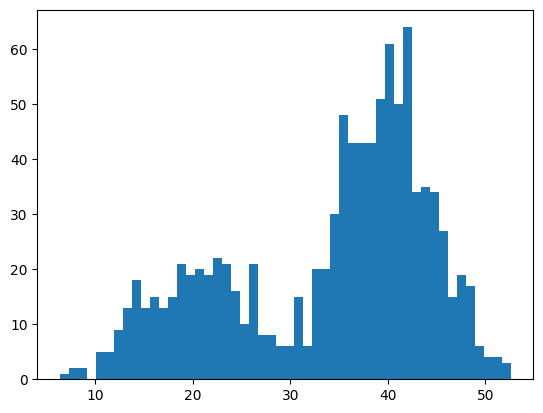

In [ ]:
#plot histogram bins=50

plt.hist(sample, bins=50)

In [ ]:
sample.shape

(1000,)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

#convert data to a 2D array
sample = sample.reshape(len(sample), 1)
# sample.shape

model.fit(sample)

KernelDensity(bandwidth=5)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [ ]:
# probabilites are actually probability densities
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

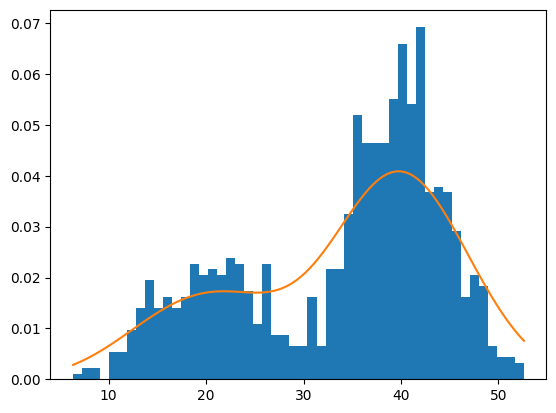

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

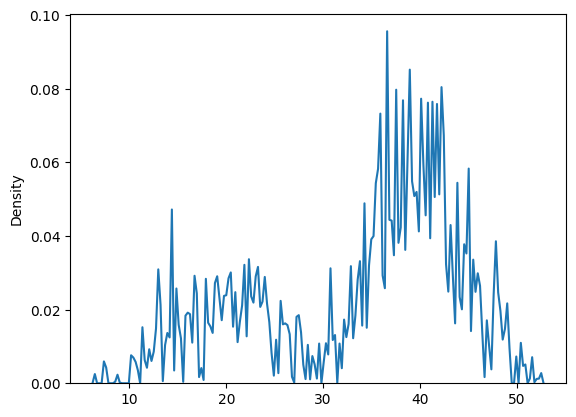

In [ ]:
# when bandwith=0.2
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

<Axes: ylabel='Density'>

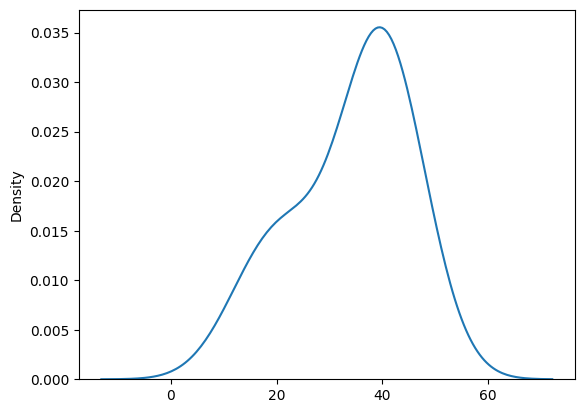

In [ ]:
# when bandwith=2
sns.kdeplot(sample.reshape(1000),bw_adjust=2.5)